<h1>Adult Census Income</h1>

<h2>Initial Set-Up</h2>

In [293]:
import numpy as np  
import pandas as pd  
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [294]:
df = pd.read_csv('data/adult.csv', sep=",")
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [295]:
df.shape

(32561, 15)

Above output shows our dataset has 32561 rows and 15 columns(attributes) 

<h2>Target variable</h2>

* Income is the target variable

In [296]:
df['income'].unique() # show unique values

array(['<=50K', '>50K'], dtype=object)

* Here we replace with 1 for all entries which have income >50k and with 0 which have income <=50k to count them

In [297]:
df['income'].replace(['<=50K','>50K'],[0,1], inplace=True) # replace with 0 and 1
df['income'].value_counts() # show number of samples for each value

0    24720
1     7841
Name: income, dtype: int64

In [298]:
# we can see the percentage of people that have >50k:
np.mean(df['income'])

0.2408095574460244

In [299]:
df['workclass'].value_counts() 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

* Above output displays the number of missing values in  workclass(As we see there are 1836 missing values) and also other attributes with respective number of values

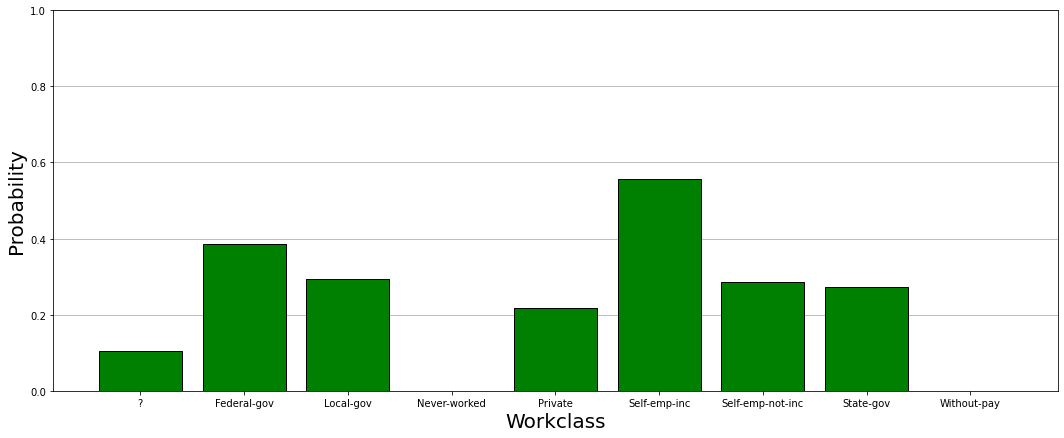

In [300]:
# probability of belonging to the group with the highest income
workclass_income = df.groupby('workclass')['income'].mean() # there is correlation as expected

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(18, 7))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(workclass_income.index.astype(str), workclass_income,
       color = 'green' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')

* As we can see in the above diagram self-employment peeps have higher probability of getting salary >50k

In [301]:
df['education'].unique()     #there are no null valuse as we can see below

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

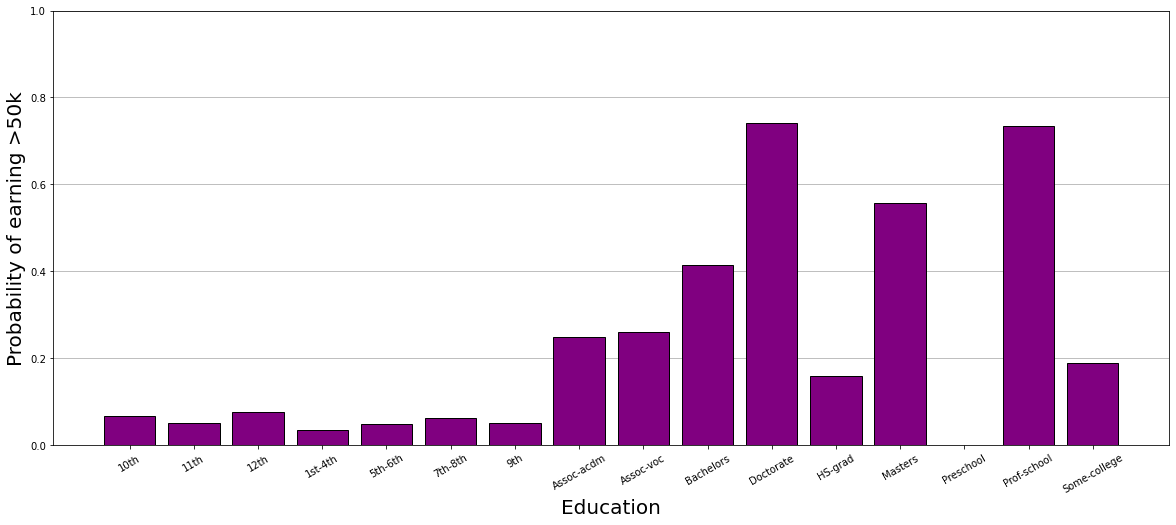

In [302]:
# probability of belonging to the group with the highest income
education_income = df.groupby('education')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.xticks(rotation=30) # rotate axis text
plt.bar(education_income.index.astype(str), education_income,
       color = 'purple', edgecolor='black' )
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Education', size=20)
plt.grid(axis='y')

* From the above graph we can infer that doctorate and prof-school educated people have more probability of getting salary of >50k

In [303]:
 df['marital.status'].unique() 

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

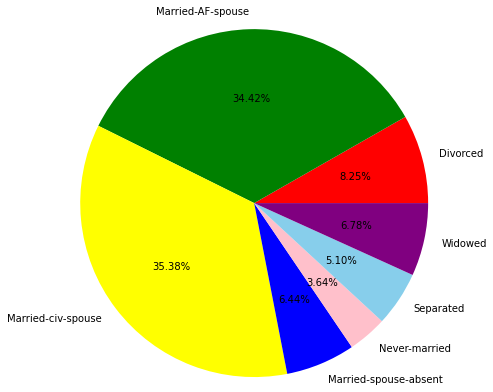

In [304]:
# probability of belonging to the group with the highest income
marital_income = dict(df.groupby('marital.status')['income'].mean())
label = list(marital_income.keys())
slices = list(marital_income.values())
color=['red','green','yellow','blue','pink','skyblue','purple']
plt.pie(slices,labels=label,colors=color,radius=2,autopct="%0.2f%%")
plt.show()

* Above pie chart shows marital statewise Probability of earning >50k

* Probabilities are what we would expect. Married people have more probability than the rest.

In [305]:
df['occupation'].value_counts() 

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

* As we see above there are 1843 missing values. It must be correlated with workclass

In [306]:
# Show null values in common
work_ocupation = df.loc[df['workclass'] == df['occupation'],'workclass']
work_ocupation.value_counts()

?    1836
Name: workclass, dtype: int64

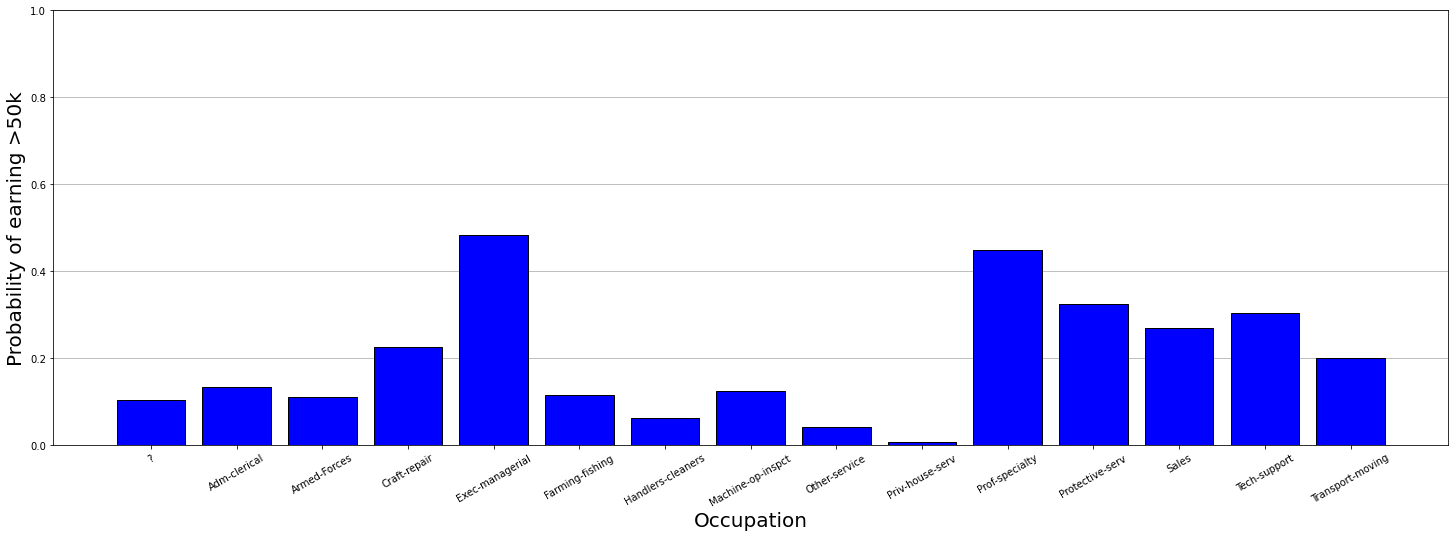

In [307]:
# probability of belonging to the group with the highest income
occupation_income = df.groupby('occupation')['income'].mean()

plt.figure(figsize=(25, 8))
plt.ylim(0,1)
plt.xticks(rotation=30) # rotate axis text
plt.bar(occupation_income.index.astype(str), occupation_income,
       color = 'blue', edgecolor='black' )
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Occupation', size=20)
plt.grid(axis='y')

In [308]:
df['relationship'].value_counts() 

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

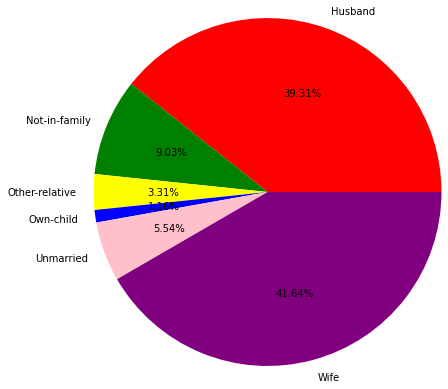

In [309]:
relationship_income = dict(df.groupby('relationship')['income'].mean())
label = list(relationship_income.keys())
slices = list(relationship_income.values())
color=['red','green','yellow','blue','pink','purple']
plt.pie(slices,labels=label,colors=color,radius=2,autopct="%0.2f%%")
plt.show()

* Above pie chart shows relationshipwise Probability of earning >50k
* As we see married people earn more than others

In [310]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

*  There are no null values.

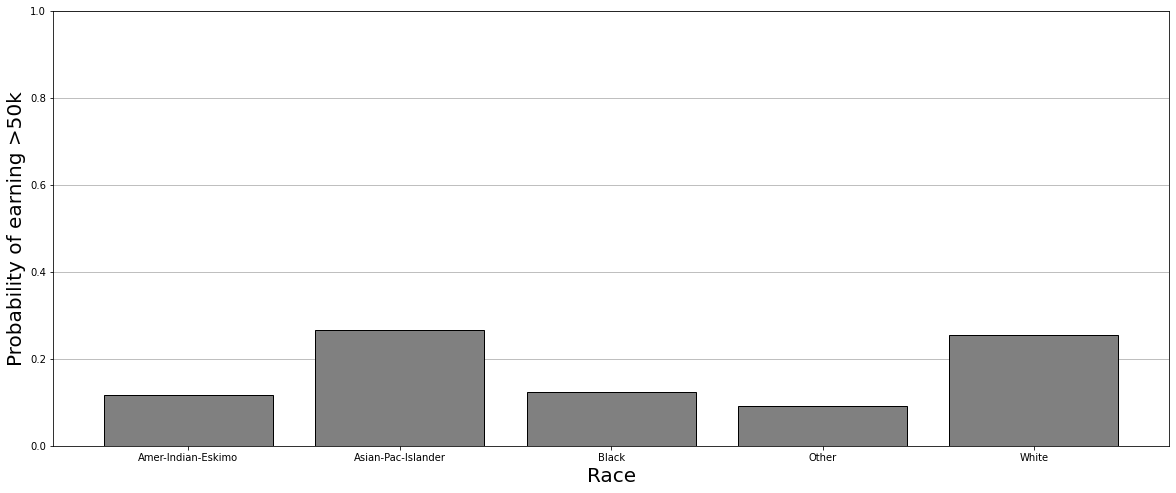

In [311]:
race_income = df.groupby('race')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(race_income.index.astype(str), race_income,
       color = 'gray', edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Race', size=20)
plt.grid(axis='y')


* As we see Asian-Pac-Islander and White people have increased probability of earning more than 50k

In [312]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

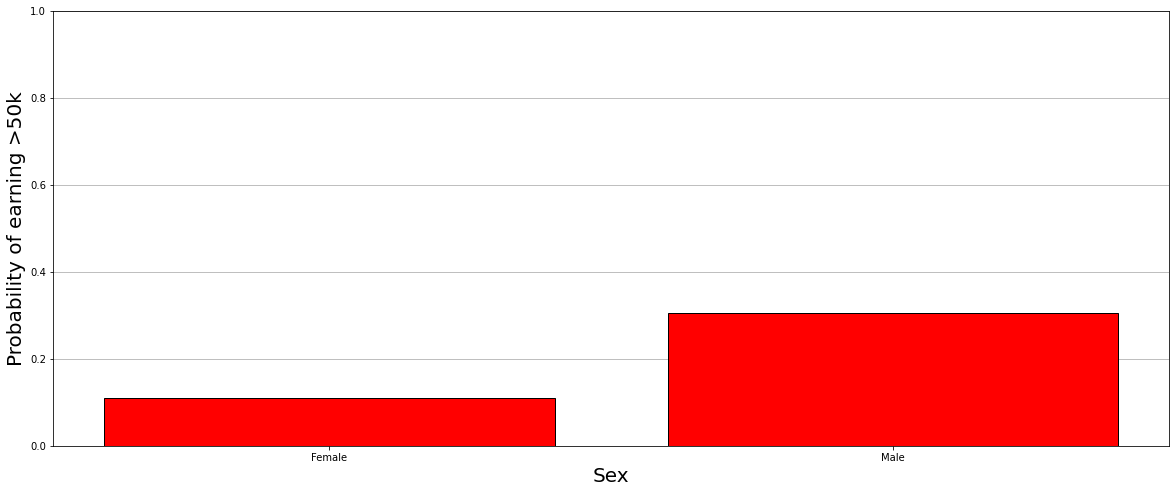

In [313]:
sex_income = df.groupby('sex')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(sex_income.index.astype(str), sex_income,
       color = 'red', edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Sex', size=20)
plt.grid(axis='y')

* Males have higher probability of earning >50k than females.

In [314]:
df['native.country'].unique() 

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

* Here we can observe missing values 

* Below code displays the number of missing values in native.country

In [315]:
df.loc[df['native.country'] == '?', 'native.country'].count() 

583

In [316]:
# Show if missing values have something to do with occupation missing data
df.loc[df['native.country'] == 'occupation','occupation' ].count()

0

In [317]:
# Show if missing values have something to do with workclass missing data
df.loc[df['native.country'] == 'workclass','workclass' ].count()

0

<h1>Correlation between variables</h1>

<h2>Education</h2>

In [318]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

* No null values (i.e. ?) exists

In [319]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

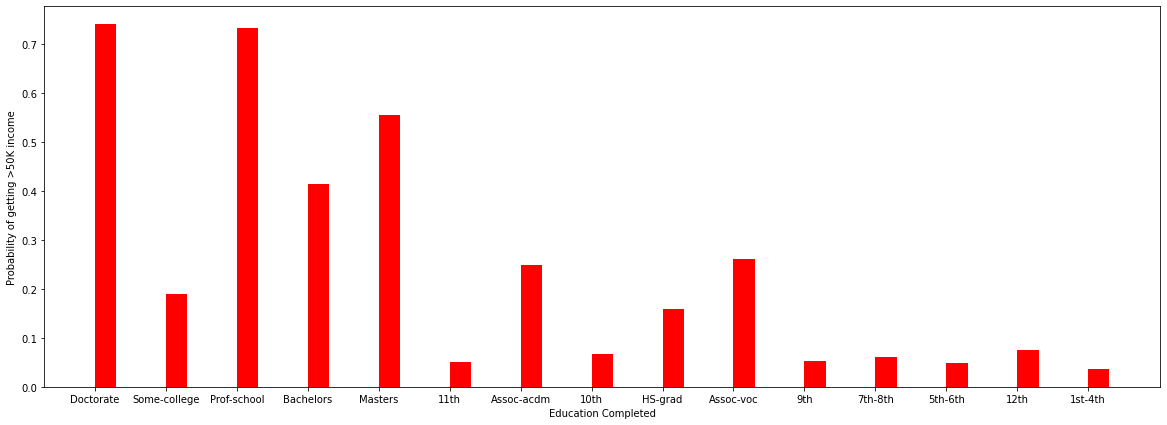

In [320]:
dt = {}
dttotl = dict(df['education'].value_counts()) # Gathers the frequencies of each element in education attribute.
prob = {}

# Counting number of people having income >50K.
for index, row in df.iterrows():
    
    if (row['income'] == 1):
        try:
            dt[row['education']] += 1
        except:
            dt[row['education']] = 1

for key in dt:
    prob[key] = dt[key] / dttotl[key] # Calculates the probability of getting >50K income for a particular education.

edu = list(prob.keys())
pb = list(prob.values())

plt.figure(figsize = (20, 7))
plt.bar(edu, pb, color = 'Red', align = 'edge', width = 0.3)
plt.xlabel("Education Completed")
plt.ylabel("Probability of getting >50K income")
plt.show()

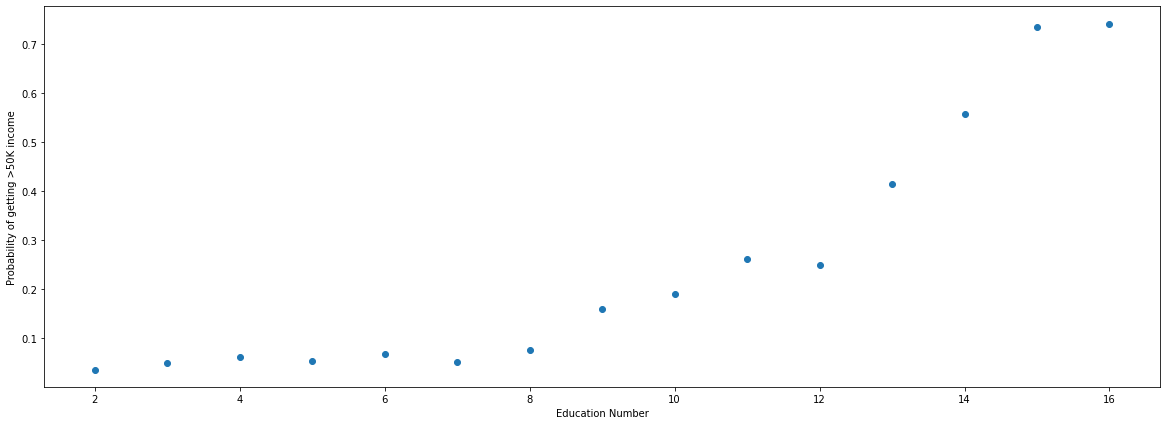

In [321]:
dt = {}
dttotl = dict(df['education.num'].value_counts())
prob = {}

for index, row in df.iterrows():
    
    if (row['income'] == 1):
        try:
            dt[row['education.num']] += 1
        except:
            dt[row['education.num']] = 1

for key in dt:
    prob[key] = dt[key] / dttotl[key]

edulvl = list(prob.keys())
pb = list(prob.values())

plt.figure(figsize = (20, 7))
plt.scatter(edulvl, pb)
plt.xlabel("Education Number")
plt.ylabel("Probability of getting >50K income")
plt.show()

* Above scatter plot shows the correlation between income (here scale of income is probability form) and education(here education is represented by education number)

<h2>Age</h2>

In [322]:
df['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [323]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

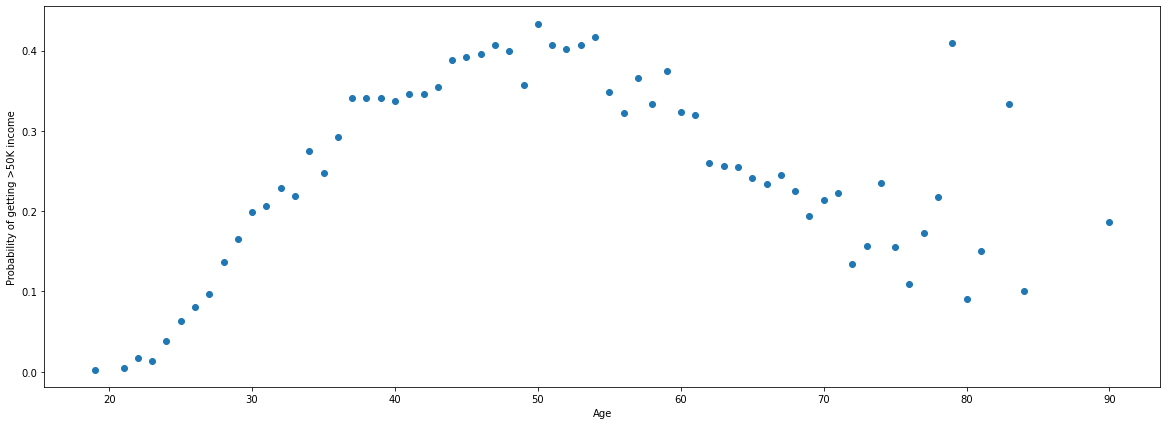

In [324]:
dt = {}
dttotl = dict(df['age'].value_counts())
prob = {}

for index, row in df.iterrows():
    
    if (row['income'] == 1):
        try:
            dt[row['age']] += 1
        except:
            dt[row['age']] = 1

for key in dt:
    prob[key] = dt[key] / dttotl[key]

age = list(prob.keys())
pb = list(prob.values())

plt.figure(figsize = (20, 7))
plt.scatter(age, pb)
plt.xlabel("Age")
plt.ylabel("Probability of getting >50K income")
plt.show()

* Above scatter plot shows the correlation between income (here scale of income is probability form) and age of the person
* As we can observe from the graph 45-55 age people have more income 

<h2>Working Hours Per Week</h2>

In [325]:
df['hours.per.week'].unique()

array([40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 15, 70, 52,
       72, 39,  6, 65, 12, 80, 67, 99, 30, 75, 26, 36, 10, 84, 38, 62, 44,
        8, 28, 59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 63,  1, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 11, 14, 77, 31, 78, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

In [326]:
df['hours.per.week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: hours.per.week, Length: 94, dtype: int64

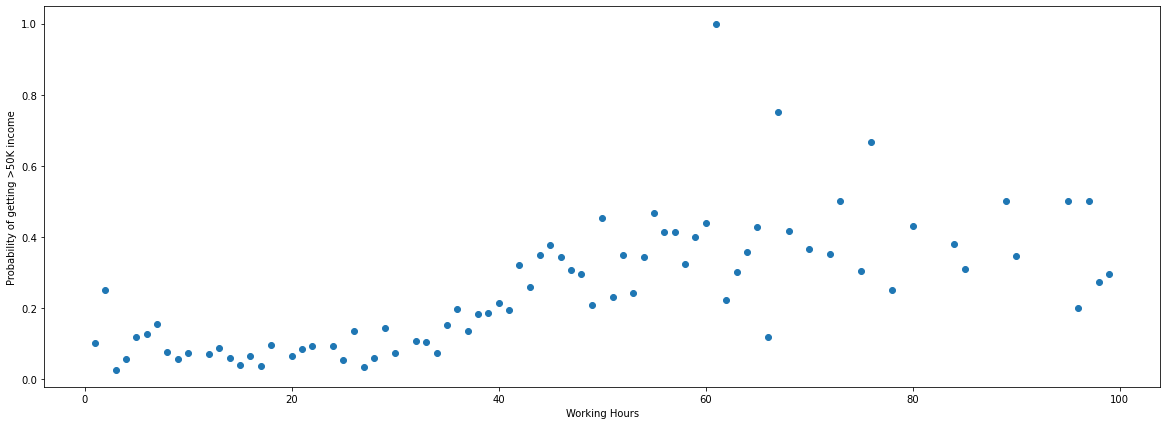

In [327]:
dt = {}
dttotl = dict(df['hours.per.week'].value_counts())
prob = {}

for index, row in df.iterrows():
    
    if (row['income'] == 1):
        try:
            dt[row['hours.per.week']] += 1
        except:
            dt[row['hours.per.week']] = 1

for key in dt:
    prob[key] = dt[key] / dttotl[key] # Calculates the probability of getting >50K income for a particular education.

hours = list(prob.keys())
pb = list(prob.values())

plt.figure(figsize = (20, 7))
plt.scatter(hours, pb)
plt.xlabel("Working Hours")
plt.ylabel("Probability of getting >50K income")
plt.show()

* Above scatter plot shows the correlation between income (here scale of income is probability form) and working hours per week of the person
* Here we can observe positive correlation i.e as working hours per week increases the probability of having salary >50k increases 

<h2>CORRELATION MATRIX</h2>

In [328]:
df.info() # Show continuous variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


<AxesSubplot:>

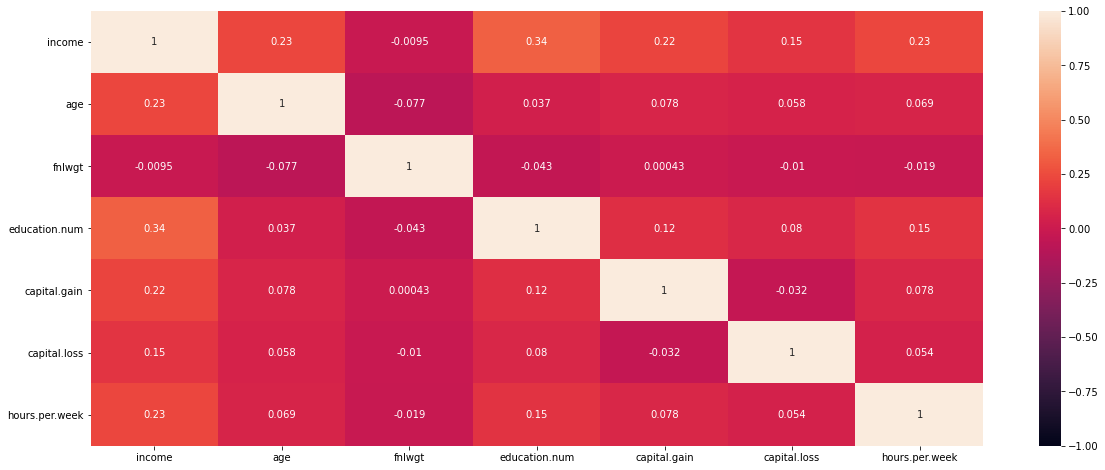

In [329]:
# Group all continuous variables 
df_continuous = df[['income','age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
# Correlation matrix
plt.figure(figsize=(20, 8))
sns.heatmap(data=df_continuous.corr(), annot=True, vmin=-1, vmax=1)

* Here from the above matrix we come to know which attributes are highly correlated
* fnlwgt has less correlation with income 
* education.num has highest correlation with income

In [330]:
df['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [331]:
df.groupby('age')['age'].count()

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64

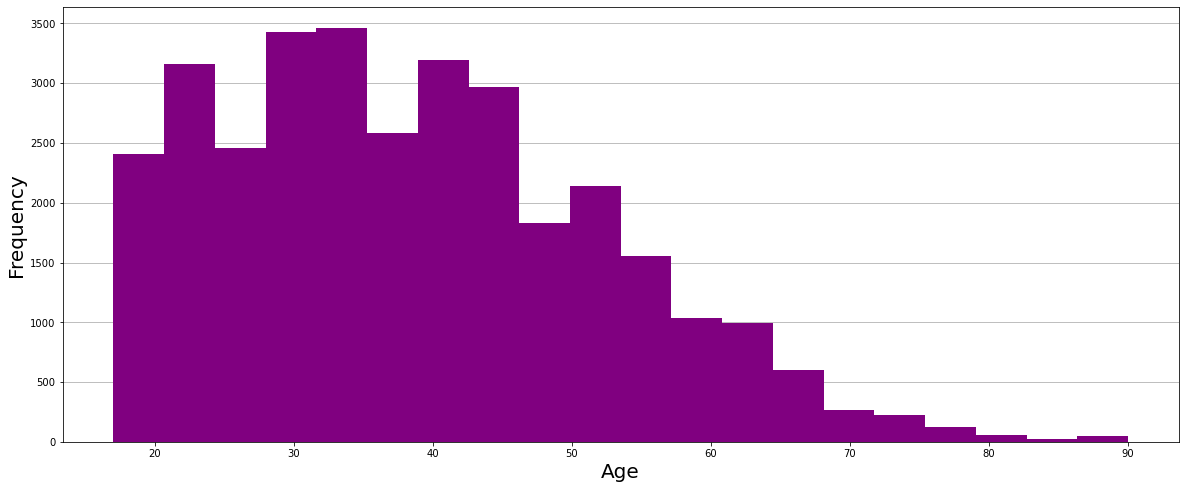

In [332]:
# plot histogram
plt.figure(figsize=(20, 8))
plt.hist(df['age'],density=False, bins=20, color = 'purple')
plt.ylabel('Frequency', size=20)
plt.xlabel('Age', size=20)
plt.grid(axis='y')

* The data is right skewed. More samples of younger people is present. This will be taken care by stratified sampling during model building

In [333]:
# Show average age by income
df.groupby("income")["age"].mean() 

income
0    36.783738
1    44.249841
Name: age, dtype: float64

* People with more than 50k are on average older.

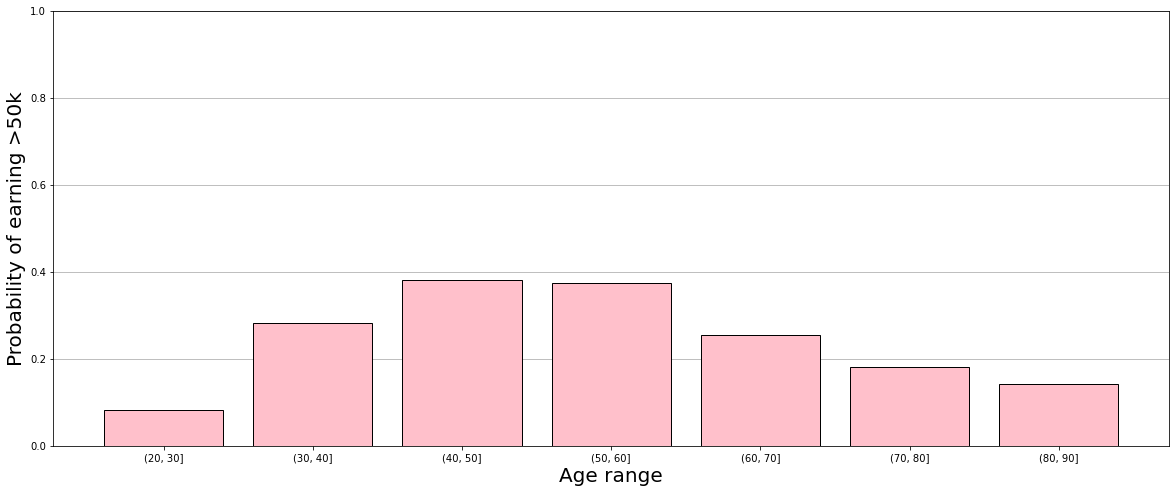

In [334]:
# divide age into groups
age_range = pd.cut(df['age'], bins = [20,30,40,50,60,70,80,90])

# show probability of belonging to the group with the highest income
age_income = df.groupby(age_range)['income'].mean()

# barplot showing probability of belonging to the group with the highest income per age range
plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.bar(age_income.index.astype(str), age_income, color = 'pink',
       edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Age range', size=20)
plt.grid(axis='y')

* Results match with what we would expect(i.e people of age between 40-60 have more income)

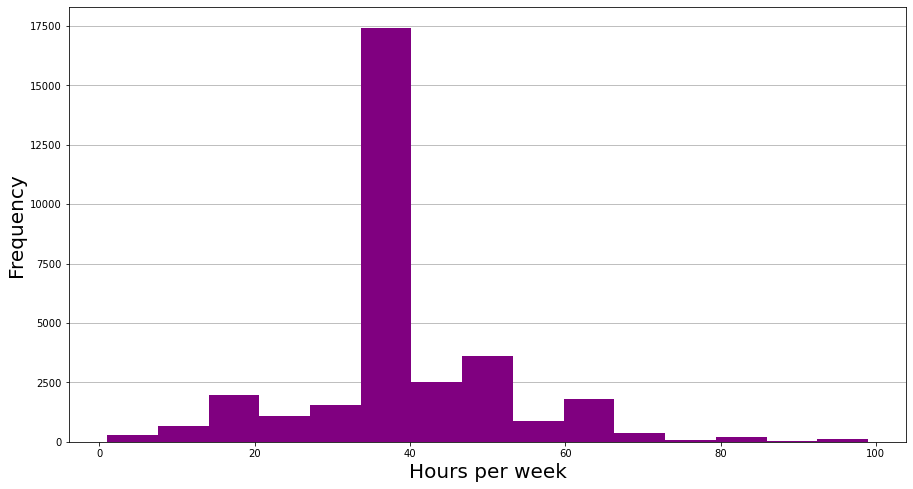

In [335]:
# plot histogram
plt.figure(figsize=(15, 8))
plt.hist(df['hours.per.week'],density=False, bins=15,  color = 'purple')
plt.ylabel('Frequency', size=20)
plt.xlabel('Hours per week', size=20)
plt.grid(axis='y')

* More people work between 30-50 hours a week

<h1>CLEANING THE DATA</h1>

<h2>Drop useless variables</h2>

* We have seen that fnlwgt variable has a really small correlation with the target variable so we can drop it. We can also drop education.num since not doing that it will result in a multicollinearity problem with education.

In [336]:
df = df.drop('fnlwgt', axis=1)
df = df.drop('education.num', axis=1)
df.shape

(32561, 13)

<h2> Deal with missing data </h2>

* As we have a lot of data and the missing values is just a small part of the dataset, we drop rows with missing values.

In [337]:
df = df.loc[ (df['workclass'] != '?') & (df['occupation'] != '?') & (df['native.country']!= '?')]
df.shape

(30162, 13)